# Software induction group project
We have chosen to do project 6 which is to do with Monte Carlo simulation in order to do integration. My personal aim is to make a general function to do integration in this way using Python. The first part of the overall group task is to evaluate the following integral:

$$\int_{0}^{1}{\int_{0}^{1}{\frac{1}{1+\sin{x}^{2}+\sin{y}^{2}}}}$$

I begin to tackle this by considering writing a function to find the Monte Carlo estimate for integrals in one dimension below:

In [3]:
# Simpler problem: How to do Monte-Carlo to compute an integral in 1 dimension
import numpy as np
def integrand(x): # Function that we wish to integrate 
    output=np.square(x) #This is simply x^2
    return output

def MonteCarlo1D(lowerLim,upperLim,n): # Function which carries out MC in 1D 
    volumeElement=upperLim-lowerLim # In one dimension, the volume element is the difference between the limits
    MC_estimates_various_n=np.zeros(len(n))
    for i in range(0,len(n)):
        nodes=np.random.uniform(lowerLim,upperLim,n[i])
        evals=integrand(nodes) # Evaluate the function at the nodes
        MC_estimates_various_n[i]=volumeElement*np.mean(evals) # Find the mean of the evaluations plus multiply by 'volume'
    return MC_estimates_various_n

n=np.arange(1,100001,1000) # Generate equally spaced vector which tells us how many random points to use 
data=MonteCarlo1D(0.0,2.0,n) # Call the function to conduct MC and estimate the integral


Text(0, 0.5, 'Monte-Carlo estimate')

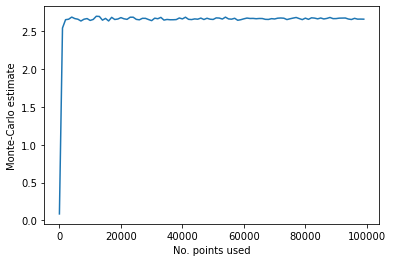

In [4]:
from matplotlib import pyplot 
pyplot.plot(n,data) # Plot the Monte Carlo estimate against the number of random points used
pyplot.xlabel('No. points used')
pyplot.ylabel('Monte-Carlo estimate')

Text(0, 0.5, 'Monte-Carlo error')

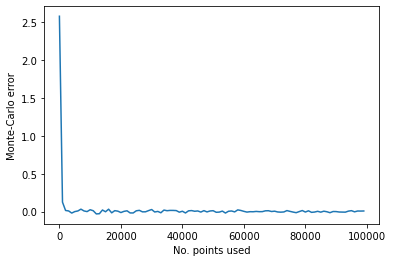

In [5]:
error=-(data-(8.0/3.0)*np.ones(len(data))) # Find the error in the Monte Carlo estimate
pyplot.plot(n,error)
pyplot.xlabel('No. points used')
pyplot.ylabel('Monte-Carlo error')

Now that I have managed to write a function for the one-dimensional integral, I can move on to the two-dimensional case.
The below chunk of code finds the Monte Carlo estimate for the integral mentioned at the beginning of this notebook.
It plots the estimates against the number of evaluation points and then the error.

Text(0, 0.5, 'Monte-Carlo estimate')

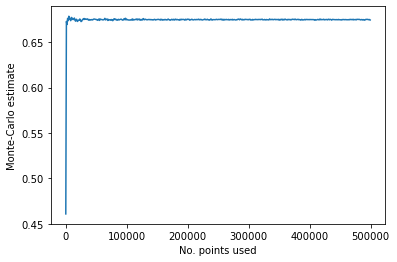

In [6]:
def f(x,y): # Function that hands back the value of the function at values of x and y
    return 1/(1+np.sin(x)**2+np.sin(y)**2) 

def MonteCarlo2D(lowerLim_x,upperLim_x,lowerLim_y,upperLim_y,n): # Function that performs Monte Carlo for two-dimensional integrals
    x_range=upperLim_x-lowerLim_x # Integration range of x
    y_range=upperLim_y-lowerLim_y # ... y 
    volumeElement=x_range*y_range # Volume element: Alternatively you could transform x and y onto integration domain (0,1)x(0,1)
    MC_estimates_various_n=np.zeros(len(n)) 
    for i in range(0,len(n)): 
        nodes_x=np.random.uniform(lowerLim_x,upperLim_x,n[i])
        nodes_y=np.random.uniform(lowerLim_y,upperLim_y,n[i])
        function_Values=f(nodes_x,nodes_y) # Call function above to evaluate at these values of x and y
        MC_estimates_various_n[i]=volumeElement*np.mean(function_Values) # Calculate the Monte Carlo estimate from the above
    return MC_estimates_various_n

n=np.arange(1,500001,1000) 
data2D=MonteCarlo2D(0,1,0,1,n) # Find the Monte Carlo estimate for various numbers of random points
pyplot.plot(n,data2D) # Plot 
pyplot.xlabel('No. points used')
pyplot.ylabel('Monte-Carlo estimate')

Text(0, 0.5, 'Monte-Carlo error')

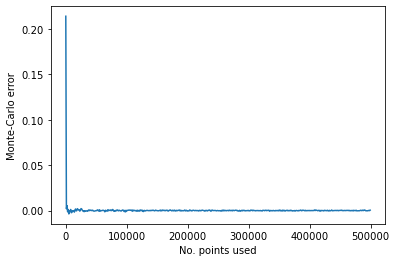

In [7]:
error=-(data2D-(0.675024)*np.ones(len(data2D))) # Find error and plot
pyplot.plot(n,error)
pyplot.xlabel('No. points used')
pyplot.ylabel('Monte-Carlo error')

The estimates are clearly almost identical in accuracy for very large values of n. We might want to have a look at some smaller values in order to investigate the convergence. 

Text(0, 0.5, 'Monte-Carlo error')

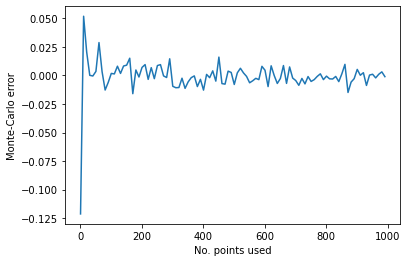

In [8]:
n=np.arange(1,1001,10) # We might look at a range of values between 1 and 1001
data_small_n=MonteCarlo2D(0,1,0,1,n) 
error=-(data_small_n-(0.675024)*np.ones(len(data_small_n))) # Find error and plot
pyplot.plot(n,error)
pyplot.xlabel('No. points used')
pyplot.ylabel('Monte-Carlo error')

Clearly we have a lot more variation for smaller values of n! This is what we might expect given that we are using very few evaluations of the function. May also want to test that the order of convergence is what we expect.

[  1000   4000  16000  64000 256000]
[0.00355705 0.0018005  0.00092084 0.00043455 0.00022038]


Text(0.5, 1.0, 'Error convergence with 1000 estimates from each n')

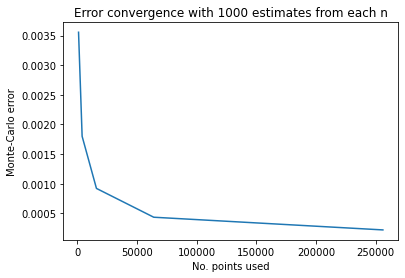

In [9]:
n=np.arange(1000,1005,1)
for i in range(0,4):
    n[i+1]=n[i]*4
print(n)
trials=1000
convergence_data=np.zeros((trials,5))
for i in range(0,trials):
    data_convergence=MonteCarlo2D(0,1,0,1,n) 
    error_convergence=-(data_convergence-(0.675024)*np.ones(len(data_convergence))) # Find error 
    error_convergence=np.abs(error_convergence)
    convergence_data[i,:]=error_convergence
column_means = convergence_data.mean(axis=0)
print(column_means)
pyplot.plot(n,column_means)
pyplot.xlabel('No. points used')
pyplot.ylabel('Monte-Carlo error')
pyplot.title('Error convergence with 1000 estimates from each n')

Text(0.5, 1.0, 'Error convergence with 1000 estimates from each n')

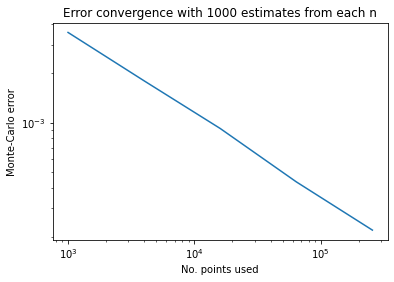

In [10]:
pyplot.loglog(n,column_means)
pyplot.xlabel('No. points used')
pyplot.ylabel('Monte-Carlo error')
pyplot.title('Error convergence with 1000 estimates from each n')

As we can see, the plot above is a straight line! Furthermore, the slope of this line is approximately equal to $-\frac{1}{2}$ which is exactly what we expected given the theoretical order of accuracy.